# 감성분석 예제  2: 영화 감상평  예제


### 5개의 Label : 5단계 분석
- 0 : '부정적'
- 1 : '약간 부정적'
- 2 : '중립적'
- 3 : '약간 긍정적'
- 4 : '긍정적'

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# import os

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re

from tqdm import tqdm

In [4]:
from tensorflow.keras.utils import to_categorical
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Bidirectional


tf.random.set_seed(123)

random.seed(123)

## 데이터 가져오기

In [6]:
train= pd.read_csv("/content/drive/My Drive/NLP_LAB/train.tsv", sep="\t")  # tsv: tab seperated value

train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
train.shape

(156060, 4)

### 텍스트 전처리

In [8]:

def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['Phrase']):
        
        # remove html content
        # review_text = BeautifulSoup(sent).get_text() 
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", sent)  # 영문자이외에는 공백으로 변경
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower()) 
    
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]  # 표제어
    
        reviews.append(lemma_words)

    return(reviews)



In [11]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [12]:
# 전처리 코드 실행
train_sentences = clean_sentences(train)
# test_sentences = clean_sentences(test)
print(len(train_sentences))
# print(len(test_sentences))

100%|██████████| 156060/156060 [00:26<00:00, 5933.71it/s]

156060


In [13]:
# train_sentences[0]

In [14]:
target=train.Sentiment.values   # raw Y
print(target,target.shape)       # (156060,)
y_target = to_categorical(target)  # one-hot 벡터로 변환
print(y_target,y_target.shape)   # target Y: (156060, 5)
num_classes=y_target.shape[1]
print('num_classes:',num_classes)

[1 2 2 ... 3 2 2] (156060,)
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]] (156060, 5)
num_classes: 5


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


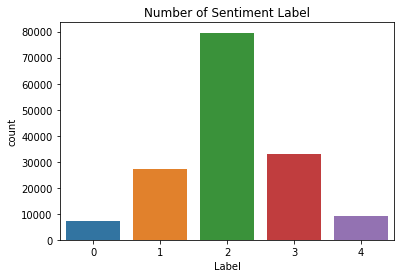

In [15]:
# Y 레이블의 분포
print(train['Sentiment'].value_counts())
sns.countplot(train['Sentiment'])
plt.xlabel('Label')
plt.title('Number of Sentiment Label')
plt.show()

#

In [16]:
# stratify=y_target: y값의 분포를 원본과 동일한 비율로 split시킴
X_train,X_val,y_train,y_val=train_test_split(train_sentences,y_target,test_size=0.2,stratify=y_target)

In [17]:
X_train

[['filmmaking'],
 ['chilling', 'advantage'],
 ['histrionic', 'muse'],
 ['without', 'lrb', 'de', 'niro', 'rrb'],
 ['desplat', 's'],
 ['be', 'emotional'],
 ['know',
  'how',
  'to',
  'suffer',
  'and',
  'if',
  'you',
  'see',
  'this',
  'film',
  'you',
  'll',
  'know',
  'too'],
 ['emergence'],
 ['be', 'a', 'bit', 'disjointed'],
 ['the', 'biggest', 'problem', 'i', 'have'],
 ['is',
  'felt',
  'not',
  'the',
  'craven',
  'of',
  'a',
  'nightmare',
  'on',
  'elm',
  'street',
  'or',
  'the',
  'hill',
  'have',
  'eye',
  'but',
  'the',
  'sad',
  'schlock',
  'merchant',
  'of',
  'deadly',
  'friend'],
 ['in', 'this', 'schlocky', 'horror', 'action', 'hybrid'],
 ['pity', 'anyone', 'who', 'see', 'this', 'mishmash'],
 ['an',
  'ambitious',
  'movie',
  'that',
  'like',
  'shiner',
  's',
  'organizing',
  'of',
  'the',
  'big',
  'fight',
  'pull',
  'off',
  'enough',
  'of',
  'it',
  'effect',
  'to',
  'make',
  'up',
  'for',
  'the',
  'one',
  'that',
  'do',
  'n',
  '

## 

In [18]:
# 단어의 길이를 구함

unique_words = set()
len_max = 0

for sent in tqdm(X_train):
    
    unique_words.update(sent)   # 집합에 넣어 중복 삭제
    
    if(len_max<len(sent)):  
        len_max = len(sent)   # 가장 긴 문장의 길이를 구한다
        
#
print(len(list(unique_words)))
print(len_max)  # 48 : sequence_lenghth

100%|██████████| 124848/124848 [00:00<00:00, 632632.86it/s]

13734
48


In [19]:
list(unique_words)[-1] # 마지막 단어

'vacant'

## 토큰화

In [20]:
tokenizer = Tokenizer(num_words=len(list(unique_words))) # 13732
tokenizer.fit_on_texts(list(X_train))

#texts_to_sequences(texts)

X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
# X_test = tokenizer.texts_to_sequences(test_sentences)


X_train = sequence.pad_sequences(X_train, maxlen=len_max)  # 48
X_val = sequence.pad_sequences(X_val, maxlen=len_max)
# X_test = sequence.pad_sequences(X_test, maxlen=len_max)

print(X_train.shape,X_val.shape)
X_train[:3]   # 48개 크기로 앞쪽에 0으로 패딩

(124848, 48) (31212, 48)


array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   402],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,  1178,  2479],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,   

## 학습 모델 구현

In [21]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 2)
callback = [early_stopping]

In [26]:
model = Sequential([
    Embedding(len(list(unique_words)),300,input_length=len_max),
    LSTM(128,dropout=0.5, recurrent_dropout=0.0,return_sequences=True),
    LSTM(64,dropout=0.5, recurrent_dropout=0.0,return_sequences=False),
    Dense(100,activation='relu'),
    Dropout(0.5),
    Dense(num_classes,activation='softmax')
    ])

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 48, 300)           4120200   
_________________________________________________________________
lstm_6 (LSTM)                (None, 48, 128)           219648    
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 505       
Total params: 4,396,261
Trainable params: 4,396,261
Non-trainable params: 0
____________________________________________

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=6, batch_size=256, verbose=1,
                  callbacks=callback)

Epoch 1/6
488/488 [==============================] - 51s 104ms/step - loss: 0.8827 - accuracy: 0.6407 - val_loss: 0.8182 - val_accuracy: 0.6648
Epoch 2/6
488/488 [==============================] - 50s 102ms/step - loss: 0.7735 - accuracy: 0.6829 - val_loss: 0.7934 - val_accuracy: 0.6738
Epoch 3/6
488/488 [==============================] - 49s 100ms/step - loss: 0.7150 - accuracy: 0.7039 - val_loss: 0.7984 - val_accuracy: 0.6753
Epoch 4/6
333/488 [===================>..........] - ETA: 15s - loss: 0.6714 - accuracy: 0.7197

In [ ]:
import matplotlib.pyplot as plt

epoch_count = range(1, len(history.history['loss']) + 1)

plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### 정확도 측정